# Project: Wrangling and Analyze Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assessing">Assessing Data</a></li>
<li><a href="#cleaning">Cleaning Data</a></li>   
<li><a href="#storing">Storing Data</a></li>
<li><a href="#analysis">Analysing and Visualizing Data</a></li>
<li><a href="#conclusion">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
### Project Description
This project analyzes the WeRateDogs twitter page.

The dataset is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

The WeRateDogs Twitter archive contains basic tweet data for all 2356 of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo).

Additional data was gathered from Twitter's API for the tweet Ids in the twitter archive dataset. These additional data includes the like counts, retweet counts etc.

Furthermore, a table full of image predictions which contains the results of the neural network classifier that classifies breeds of dogs from   alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction was gotten from the Udacity website.

### Project Outline
The project activities include the following;
>**1. Data Gathering**

>**2. Assessing Data**

>**3. Cleaning Data**

>**4. Data Storage**

>**5. Data Analysis and Visualization**

### Tools and Libraries Used
>**Data Wrangling**: Python, Pandas, Numpy, json, requests, tweepy (twitter API)

>**Visualization**: Matplotlib, Seaborn

>**Notebook**: Jupyter Notebook

<a id='gathering'></a>
## Data Gathering

Import libraries and packages

In [1]:
# Import libraries to read in and process data 
import numpy as np
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from empiricaldist import Pmf, Cdf

%matplotlib inline

In [2]:
# Set visualization style and color
color =sns.color_palette()[0]
sns.set_style('whitegrid');

In the cells below, **all** three pieces of data for this project are gathered and loaded in the notebook. 
1. Directly download the WeRateDogs Twitter archive data (twitter-archive-enhanced.csv)

In [3]:
# Read twitter-archive data into a dataframe
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv) [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv).

In [4]:
# Using requests library to get file on the internet
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

image_pred = pd.read_csv(url, sep="\t")

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# Getting data from twitter using the Twitter API tweepy
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [6]:
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Rate limit reached. Sleeping for: 21


Success
743: 780476555013349377
Success
744: 780459368902959104
Success
745: 780192070812196864
Success
746: 780092040432480260
Success
747: 780074436359819264
Success
748: 779834332596887552
Success
749: 779377524342161408
Success
750: 779124354206535695
Success
751: 779123168116150273
Fail
752: 779056095788752897
Success
753: 778990705243029504
Success
754: 778774459159379968
Success
755: 778764940568104960
Success
756: 778748913645780993
Success
757: 778650543019483137
Success
758: 778624900596654080
Success
759: 778408200802557953
Success
760: 778396591732486144
Success
761: 778383385161035776
Success
762: 778286810187399168
Success
763: 778039087836069888
Success
764: 778027034220126208
Success
765: 777953400541634568
Success
766: 777885040357281792
Success
767: 777684233540206592
Success
768: 777641927919427584
Success
769: 777621514455814149
Success
770: 777189768882946048
Success
771: 776819012571455488
Success
772: 776813020089548800
Success
773: 776477788987613185
Success
774

Rate limit reached. Sleeping for: 195


Success
1643: 684097758874210310
Success
1644: 683857920510050305
Success
1645: 683852578183077888
Success
1646: 683849932751646720
Success
1647: 683834909291606017
Success
1648: 683828599284170753
Success
1649: 683773439333797890
Success
1650: 683742671509258241
Success
1651: 683515932363329536
Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
16

In [87]:
# Load in the tweet-json data into a DataFrame 
twitter_add = pd.read_json("tweet_json.txt", lines=True)

<a id='assessing'></a>
## Assessing Data
* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.

In [88]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [89]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [90]:
twitter_archive.in_reply_to_status_id.nunique()

77

In [91]:
twitter_archive.duplicated().sum()

0

In [92]:
twitter_archive.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [93]:
twitter_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [94]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [95]:
twitter_archive.timestamp.nunique()

2356

In [96]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [97]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [98]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [99]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [100]:
twitter_archive["retweeted_status_id"].unique()

array([           nan, 8.87473957e+17, 8.86053734e+17, 8.30583321e+17,
       8.78057613e+17, 8.78281511e+17, 6.69000397e+17, 8.76850772e+17,
       8.66334965e+17, 8.68880398e+17, 8.73213776e+17, 8.72657584e+17,
       8.41077006e+17, 8.59196979e+17, 8.68552279e+17, 8.65013420e+17,
       8.66450706e+17, 8.37820168e+17, 8.63062472e+17, 8.06629075e+17,
       8.60563773e+17, 8.60914485e+17, 7.61672994e+17, 8.39549326e+17,
       8.57061112e+17, 8.44704788e+17, 8.56330159e+17, 8.42163533e+17,
       8.55122533e+17, 8.31650052e+17, 8.29374342e+17, 8.48289382e+17,
       8.33124695e+17, 8.32369877e+17, 8.47971000e+17, 7.56288534e+17,
       7.73308824e+17, 8.07106841e+17, 8.17423860e+17, 8.40632337e+17,
       6.67152164e+17, 8.39289919e+17, 8.38905981e+17, 7.83839966e+17,
       8.20749717e+17, 8.37011345e+17, 8.36648149e+17, 8.17827839e+17,
       7.86963064e+17, 8.35264099e+17, 7.53039831e+17, 8.29501995e+17,
       8.32434358e+17, 8.32766382e+17, 7.86709083e+17, 7.93286476e+17,
      

In [101]:
twitter_archive.retweeted_status_user_id.nunique()

25

In [102]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [103]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [104]:
image_pred.img_num.unique()

array([1, 4, 2, 3], dtype=int64)

In [105]:
image_pred.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [106]:
image_pred.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [107]:
image_pred.p2.nunique()

405

In [108]:
image_pred.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [109]:
twitter_add.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [110]:
twitter_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2326 non-null   datetime64[ns, UTC]
 1   id                             2326 non-null   int64              
 2   id_str                         2326 non-null   int64              
 3   full_text                      2326 non-null   object             
 4   truncated                      2326 non-null   bool               
 5   display_text_range             2326 non-null   object             
 6   entities                       2326 non-null   object             
 7   extended_entities              2056 non-null   object             
 8   source                         2326 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [111]:
twitter_add.is_quote_status.unique()

array([False,  True])

In [112]:
twitter_add.possibly_sensitive_appealable.unique()

array([ 0., nan])

### Quality issues
**`Twitter Archive Table`**
1. Retweeted tweets in dataset: **retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp**

2. Missing values in the following features: **in_reply_to_status_id, in_reply_to_user_id, expanded_urls, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp**. 

3. Incorrect **timestamp, retweeted_status_timestamp,tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id** datatypes

4. Feature **Name** misrepresented by adjectives such **a, the** and **None** values.

5. Missing values represented by string **None** in the **doggo, floofer, pupper and puppo** columns and converted to **categorical** datatype.

6. Descriptive and categorical tweet source from the **source** column

**`Image Prediction Table`**

7. Predictions in **p1, p2, p3** are not dog breeds

8. Tweet_Id is in int and not string

**`Twitter Additional Table`**

9. Retweeted tweets in dataset: **retweeted_status_id**

10. Missing values in the following columns: **in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, in_reply_to_screen_name, user, geo, coordinates, place, contributors, retweeted_status, quoted_status_id, quoted_status_id_str, quoted_status_permalink, quoted_status**     

11. Redundant columns with no information to the table: **display_text_range, entities, extended_entities, user, possibly_sensitive, possibly_sensitive_appealable, favorited, retweeted**

12. Datatypes for **id** to object

### Tidiness issues
1. Dog stages in separate **4 columns(doggo, floofer, pupper, puppo)** in the `twitter archive table`

2. Data scattered across the `twitter_archive` with the `twitter_add` and `image_pred` tables.

<a id='cleaning'></a>
## Cleaning Data
This section documents all the cleaning actions performed on **all** of the issues documented during data assessment. 

A copy of all the original tables was made.

In [113]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_pred_clean = image_pred.copy()
twitter_add_clean = twitter_add.copy()

### Issue #1:
#### Define:

Drop tweet rows that are not original tweets that is has value for **retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp**.

#### Code

In [114]:
# Drop rows with value in retweeted_status_id column
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isna()].reset_index(drop=True)

#### Test

In [115]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### Issue #2:
#### Define:

Drop columns in the twitter_archive table with **sum of non-null values less than 200** in the columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp).

#### Code

In [116]:
# Define a function for dropping columns with sum of non-null values less than a particular number in the DataFrame
def missing_value_drop(df, num):
    """This function drops columns with sum of non-null values less than 'num'. Takes a DataFrame  and int as a parameter"""
    col_drop = []
    for item in df.columns:
        if sum(df[item].isna()) > num:
            col_drop.append(item)
    df.drop(columns=col_drop, inplace=True)
    
missing_value_drop(twitter_archive_clean, 200) # Calling the "missing_value_drop" on the twitter_archive_clean dataframe

#### Test

In [117]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 204.0+ KB


### Issue #3:
#### Define
Change the **timestamp** column datatype in the twitter archive table from object to datetime. **retweeted_status_timestamp** column has been dropped for having high numbers of missing values. Change the **tweet_id** column datatype in the twitter archive table from numerical values to string objects. The **in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,retweeted_status_user_id** columns have been dropped for having high numbers of missing values.

#### Code

In [118]:
# Convert column to datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

# Define a function to convert to string with  datafram and list of columns to convert as parameters
def change_dtype(df, col, target_dtype):
    """This function converts column datatype to objects. It accepts a dataframe and a list of columns in a dataframe"""
    for i in range(len(col)):
        
        if col[i] not in df.columns:
            raise ValueError("Column " + col[i] + " not found in Dataframe")
        try:
            df[col[i]] = df[col[i]].astype(target_dtype)
            
        except:
            print("Cannot convert to string")

In [119]:
# Call the change_dtype function on the listed columns
cols = ["tweet_id"]
change_dtype(twitter_archive_clean, cols, str)

#### Test

In [120]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

### Issue #4:

#### Define

Clean the feature column **name** by removing names having adjectives such as "a", "the" and "None" etc.

#### Code

In [121]:
# Function to change a value to NaN
def to_nan(df, column, values):
    """ Convert "None" values to Not a Number (NaN). Takes a DataFrame, column and list of values to change to nan as parameters"""
    for feat in column:
        for item in values:
            df[feat] = df[feat].replace(item, np.nan)

In [122]:
name_drop = ['None', 'such', 'a', 'quite', 'not', 'one', 'incredibly', 'the', 'life', 'by', 'this', 'all', 'old', 'very',
             'unacceptable', 'officially', 'my', 'space', 'mad', 'infuriating', 'just', 'his', 'an', 'getting', 'actually']
# Call the to_nan function on the name column
to_nan(twitter_archive_clean, ['name'], name_drop)
twitter_archive_clean['name'] = twitter_archive_clean['name'].str.capitalize()

#### Test

In [123]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                1392 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

### Issue #5:

#### Define

Clean missing values represented by string None in the name, doggo, floofer, pupper and puppo columns to NaN.

#### Code

In [124]:
stage_col = ['doggo', 'floofer', 'pupper', 'puppo']

to_nan(twitter_archive_clean, stage_col, ['None'])   # Function to convert values to NaN

#### Test

In [125]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                1392 non-null   object             
 8   doggo               87 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              234 non-null    object             
 11  puppo               25 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(2

### Issue #6:

#### Define

Extract Descriptive and categorical tweet source from the **source** column

#### Code

In [126]:
# Mapping the source column to a descriptive categorical datatype
source_list = {'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'Twitter for iPhone', 
               '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web Client',
               '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': 'Vine',
               '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck'}

twitter_archive_clean['source'] = twitter_archive_clean['source'].replace(source_list).astype("category")

#### Test

In [127]:
twitter_archive_clean['source'].unique()

['Twitter for iPhone', 'Twitter Web Client', 'Vine', 'TweetDeck']
Categories (4, object): ['TweetDeck', 'Twitter Web Client', 'Twitter for iPhone', 'Vine']

### Issue #7:

#### Define

Drop Columns jpg_url and img_num in the image prediction table

#### Code

In [128]:
image_pred_clean.drop(columns=['jpg_url', 'img_num'], inplace=True)

#### Test

In [129]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   p1        2075 non-null   object 
 2   p1_conf   2075 non-null   float64
 3   p1_dog    2075 non-null   bool   
 4   p2        2075 non-null   object 
 5   p2_conf   2075 non-null   float64
 6   p2_dog    2075 non-null   bool   
 7   p3        2075 non-null   object 
 8   p3_conf   2075 non-null   float64
 9   p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(3)
memory usage: 119.7+ KB


### Issue #8:
#### Define
Change tweet_id in image_pred table datatype to object

#### Code

In [130]:
change_dtype(image_pred_clean, cols, str)

#### Test

In [131]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   p1        2075 non-null   object 
 2   p1_conf   2075 non-null   float64
 3   p1_dog    2075 non-null   bool   
 4   p2        2075 non-null   object 
 5   p2_conf   2075 non-null   float64
 6   p2_dog    2075 non-null   bool   
 7   p3        2075 non-null   object 
 8   p3_conf   2075 non-null   float64
 9   p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), object(4)
memory usage: 119.7+ KB


### Issue #9:
#### Define:

Drop tweet rows that are not original tweets that is has value for **retweeted_status_id** in the twitter_add_clean table

#### Code

In [132]:
# Drop rows with value in retweeted_status_id column
twitter_add_clean = twitter_add_clean[twitter_add_clean['retweeted_status'].isna()].reset_index(drop=True)

#### Test

In [133]:
twitter_add_clean.retweeted_status.nunique()

0

### Issue #10:

#### Define

Drop columns in the twitter_add table with sum of non-null values less than 300 in columns. These are **in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, in_reply_to_screen_name, user, geo, coordinates, place, contributors, retweeted_status, quoted_status_id, quoted_status_id_str, quoted_status_permalink, quoted_status**

#### Code

In [134]:
# Calling the missing_value_drop on the twitter_add_clean table to remove columns with high number of missing values
missing_value_drop(twitter_add_clean, 300)

#### Test

In [135]:
twitter_add_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166 entries, 0 to 2165
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2166 non-null   datetime64[ns, UTC]
 1   id                             2166 non-null   int64              
 2   id_str                         2166 non-null   int64              
 3   full_text                      2166 non-null   object             
 4   truncated                      2166 non-null   bool               
 5   display_text_range             2166 non-null   object             
 6   entities                       2166 non-null   object             
 7   extended_entities              1985 non-null   object             
 8   source                         2166 non-null   object             
 9   user                           2166 non-null   object             
 10  is_quote_status         

### Issue #11:

#### Define

Drop the following columns without tangible information in them: **display_text_range, user, possibly_sensitive, possibly_sensitive_appealable, retweeted, favorited**

#### Code

In [136]:
red_drop = ['display_text_range','truncated', 'entities', 'extended_entities', 'user', 'possibly_sensitive', 'possibly_sensitive_appealable', 'id_str', 'source', 'retweeted', 'favorited']

twitter_add_clean = twitter_add_clean.drop(columns=red_drop)

#### Test

In [137]:
twitter_add_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166 entries, 0 to 2165
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   created_at       2166 non-null   datetime64[ns, UTC]
 1   id               2166 non-null   int64              
 2   full_text        2166 non-null   object             
 3   is_quote_status  2166 non-null   bool               
 4   retweet_count    2166 non-null   int64              
 5   favorite_count   2166 non-null   int64              
 6   lang             2166 non-null   object             
dtypes: bool(1), datetime64[ns, UTC](1), int64(3), object(2)
memory usage: 103.8+ KB


### Issue #12:
#### Define

Convert the id column datatype in the twitter_add table from numerical values to string objects.

#### Code

In [138]:
# Call the change_dtype function on the listed columns
cols_add = ["id"]
change_dtype(twitter_add_clean, cols_add, str)

#### Test

In [139]:
twitter_add_clean['id'].dtype

dtype('O')

### Issue #13:

#### Define

Create a new dog_stage column in the twitter archive table

#### Code

In [140]:
twitter_archive_clean['stage'] = twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ','.join(x.astype(str)), axis=1)
stage_list = {'doggo,nan,nan,nan': 'doggo', 
              'nan,nan,nan,puppo': 'puppo',
              'nan,nan,pupper,nan': 'pupper',
              'nan,floofer,nan,nan': 'floofer',
              'doggo,nan,nan,puppo': 'doggo,puppo',
              'doggo,floofer,nan,nan': 'doggo,floofer',
              'doggo,nan,pupper,nan': 'doggo,pupper'}

twitter_archive_clean['stage'] = twitter_archive_clean['stage'].replace(stage_list)
to_nan(twitter_archive_clean, ['stage'], ['nan,nan,nan,nan'])
twitter_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test

In [141]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   category           
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                1392 non-null   object             
 8   stage               344 non-null    object             
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 138.4+ KB


In [142]:
twitter_archive_clean.stage.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo,puppo',
       'doggo,floofer', 'doggo,pupper'], dtype=object)

### Issue #14

#### Define

Join twitter_archive tables with the twitter_add table and image_pred using a left join.

#### Code

In [143]:
# Merge dataframes dropping duplicates and filling na
twitter_full_clean = pd.merge(twitter_archive_clean, twitter_add_clean, how='inner', left_on=['tweet_id', 'timestamp', 'text'], right_on=['id', 'created_at', 'full_text'])

twitter_full_clean.drop(columns=['created_at', 'id', 'full_text'], inplace=True)

twitter_full_clean_dup = twitter_full_clean[(twitter_full_clean.duplicated(subset=['tweet_id', 'timestamp'], keep=False)) 
                                            & twitter_full_clean['stage'].notnull()].reset_index(drop=True)

twitter_full_clean_drp = twitter_full_clean.drop_duplicates(subset=['tweet_id', 'timestamp'], keep=False).reset_index(drop=True)

twitter_full_final = pd.concat([twitter_full_clean_drp, twitter_full_clean_dup], ignore_index=True)
twitter_full_final['retweet_count'] = twitter_full_final['retweet_count'].fillna(value=twitter_full_final['retweet_count'].median()).astype(int)
twitter_full_final['favorite_count'] = twitter_full_final['favorite_count'].fillna(value=twitter_full_final['favorite_count'].median()).astype(int)

In [144]:
# Merge the third dataframe
twitter_full_final = pd.merge(twitter_full_final, image_pred_clean, how='left', on='tweet_id')
to_bool = ['is_quote_status', 'p1_dog', 'p2_dog', 'p3_dog']
to_cat = ['stage']
change_dtype(twitter_full_final, to_bool, bool)
change_dtype(twitter_full_final, to_cat, 'category' )

#### Test

In [145]:
twitter_full_final.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,is_quote_status,...,lang,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,False,...,en,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,False,...,en,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,False,...,en,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,False,...,en,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,False,...,en,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [146]:
twitter_full_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166 entries, 0 to 2165
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2166 non-null   object             
 1   timestamp           2166 non-null   datetime64[ns, UTC]
 2   source              2166 non-null   category           
 3   text                2166 non-null   object             
 4   expanded_urls       2108 non-null   object             
 5   rating_numerator    2166 non-null   int64              
 6   rating_denominator  2166 non-null   int64              
 7   name                1384 non-null   object             
 8   stage               343 non-null    category           
 9   is_quote_status     2166 non-null   bool               
 10  retweet_count       2166 non-null   int32              
 11  favorite_count      2166 non-null   int32              
 12  lang                2166 non-null 

<a id='storing'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [147]:
# Write the Dataframe twitter_full_final to a cvs file
twitter_full_final.to_csv("twitter_archive_master.csv", index=False)

<a id='analysis'></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Dataset Description 

**Summary**: This dataset contains information from **2166 tweets** from the twitter channel of **WeRateDogs** and results from the neural network image prediction on the dogs pictures. This dataset has 22 features decribed below;
> **tweet_id**: The unique tweet identifier.

> **timestamp**: The unique date and time of making the tweets.

> **source**: Device from which the tweet was made.

> **text**: Text describing the tweet and dog. Also contains the dog rating.

>**expanded_urls**: Unique link to tweet.

>**rating_numerator**: Rating given to the dog posted typically ranges from 0 to 10 and above 10.

>**rating_denominator**: The base rating of dogs which is `10`.

>**name**: Dog's name.

>**stage**: Dog's stage according to the dogtionary: `doggo, floofer, pupper, puppo`

>**retweet_count, favorite_count**: The number of likes and retweets for each tweet.

>**lang**: Language of tweet

>**p1, p2, p3**: Breed of dogs predicted in order of confidence

>**p1_conf, p2_conf, p3_conf**: The probability of the predictions: `0 <= x <= 1`

>**p1_dog, p2_dog, p3_dog**: Boolean if prediction is a dog or not.

In [148]:
twitter_full_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166 entries, 0 to 2165
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2166 non-null   object             
 1   timestamp           2166 non-null   datetime64[ns, UTC]
 2   source              2166 non-null   category           
 3   text                2166 non-null   object             
 4   expanded_urls       2108 non-null   object             
 5   rating_numerator    2166 non-null   int64              
 6   rating_denominator  2166 non-null   int64              
 7   name                1384 non-null   object             
 8   stage               343 non-null    category           
 9   is_quote_status     2166 non-null   bool               
 10  retweet_count       2166 non-null   int32              
 11  favorite_count      2166 non-null   int32              
 12  lang                2166 non-null 

In [149]:
twitter_full_final.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,p1_conf,p2_conf,p3_conf
count,2166.000000,2166.000000,2166.000000,2166.000000,1985.000000,1.985000e+03,1.985000e+03
mean,13.219760,10.494922,2237.475993,7575.522622,0.593628,1.344403e-01,6.029936e-02
std,47.824677,7.033586,3988.282287,11193.265588,0.271917,1.005998e-01,5.088238e-02
min,0.000000,0.000000,1.000000,45.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,477.250000,1603.500000,0.362835,5.405530e-02,1.624560e-02
50%,11.000000,10.000000,1059.000000,3408.500000,0.587372,1.175080e-01,4.952370e-02
75%,12.000000,10.000000,2549.500000,9383.250000,0.845256,1.948970e-01,9.160200e-02
max,1776.000000,170.000000,70821.000000,145002.000000,1.000000,4.880140e-01,2.734190e-01


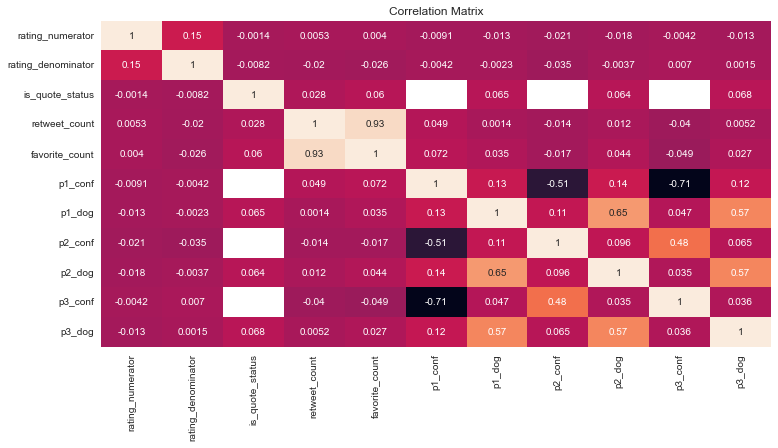

In [150]:
# Calculate the correlation for numerical values
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(twitter_full_final.corr(), cbar=False, annot=True)
plt.title('Correlation Matrix');

In [151]:
max_favorite = twitter_full_final[twitter_full_final.favorite_count == twitter_full_final.favorite_count.max()].index
max_retweeted = twitter_full_final[twitter_full_final.retweet_count == twitter_full_final.retweet_count.max()].index

assert max_favorite == max_retweeted, 'Tweet with the highest retweet is not the same as tweet with the highest likes'
print('Tweet with the highest retweet is the same as tweet with the highest likes.')
print( twitter_full_final[['tweet_id', 'favorite_count', 'retweet_count']].iloc[max_favorite])

Tweet with the highest retweet is the same as tweet with the highest likes.
               tweet_id  favorite_count  retweet_count
854  744234799360020481          145002          70821


**The tweet with the highest favorite count and retweets is tweet_id: 744234799360020481, number of likes: 145002, number of retweets: 70821**

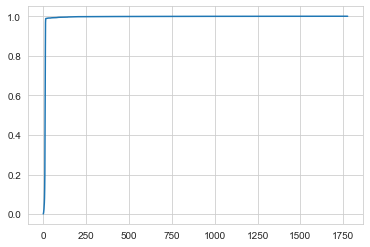

In [152]:
# Compute and plot the cummulative density function of rating numerator
numer = twitter_full_final.rating_numerator
pmf = Cdf.from_seq(numer)
pmf.plot();

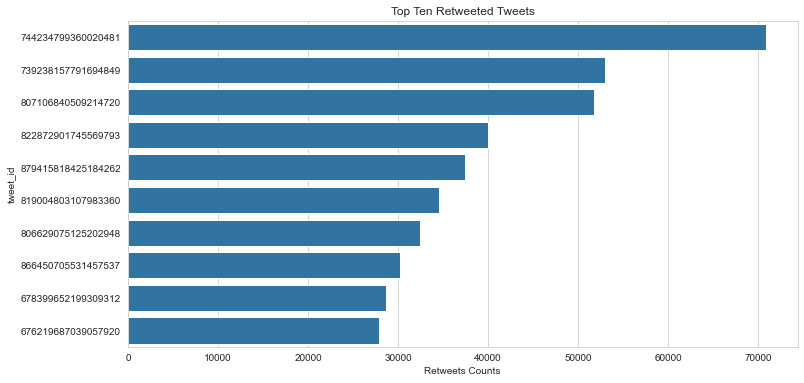

In [153]:
fig, ax = plt.subplots(figsize=(12,6))
highest_retw = twitter_full_final['retweet_count'].sort_values(ascending=False).head(10)
sns.barplot(y=twitter_full_final.tweet_id[highest_retw.index], x= highest_retw, data=twitter_full_final, color=color, orient='h')
plt.xlabel('Retweets Counts')
plt.title('Top Ten Retweeted Tweets')
fig.savefig('top_ten_retweets.jpg');

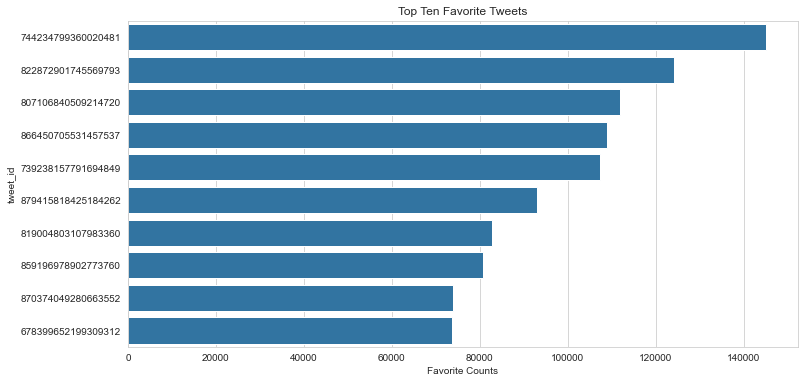

In [154]:
highest_fav = twitter_full_final['favorite_count'].sort_values(ascending=False).head(10)
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(y=twitter_full_final.tweet_id[highest_fav.index], x= highest_fav, data=twitter_full_final, color=color, orient='h')
plt.xlabel('Favorite Counts')
plt.title('Top Ten Favorite Tweets')
plt.show()
fig.savefig('top_ten_favorite.jpg');

**The figures above show the top ten tweets retweeted and liked respectively**

In [155]:
twitter_full_final.lang.value_counts(normalize=True)

en     0.993075
und    0.002770
nl     0.001385
in     0.000923
eu     0.000462
es     0.000462
tl     0.000462
et     0.000462
Name: lang, dtype: float64

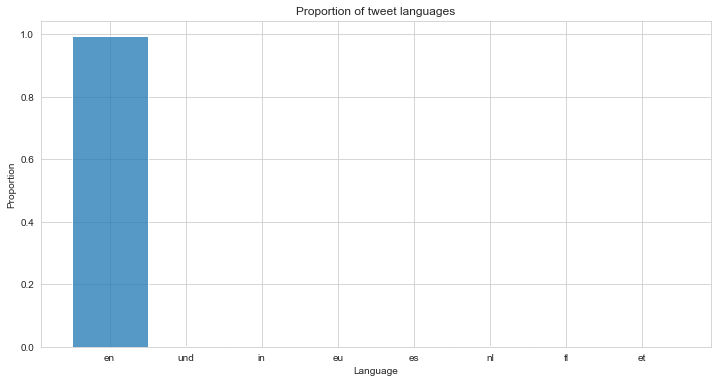

In [156]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x='lang', data=twitter_full_final, stat='proportion')
plt.xlabel("Language")
plt.title('Proportion of tweet languages')
plt.show()
fig.savefig('language.jpg');

**The data revealed that 2151 (99.31%) of the tweets were written in English Language with 7 other languages taking up about 0.69% in total. This is shown in the bar chart above.**

In [157]:
twitter_full_final.rating_numerator.value_counts().head()

12    498
10    440
11    426
13    302
9     156
Name: rating_numerator, dtype: int64

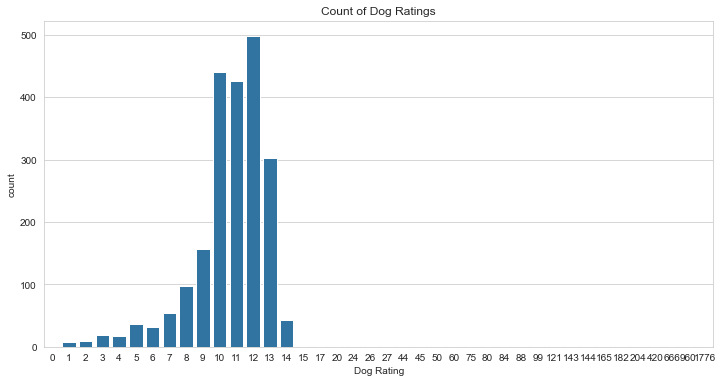

In [158]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x='rating_numerator', data=twitter_full_final, color=color)
plt.xlabel('Dog Rating')
plt.title("Count of Dog Ratings")
plt.show()
fig.savefig('dog_count.jpg');

**The most popular rating score for the dogs was** **`12`** **with count of** **`498`**. **The majority of the rating ranged from 9 and 13. The plot showed outliers with ratings having few values above 500**

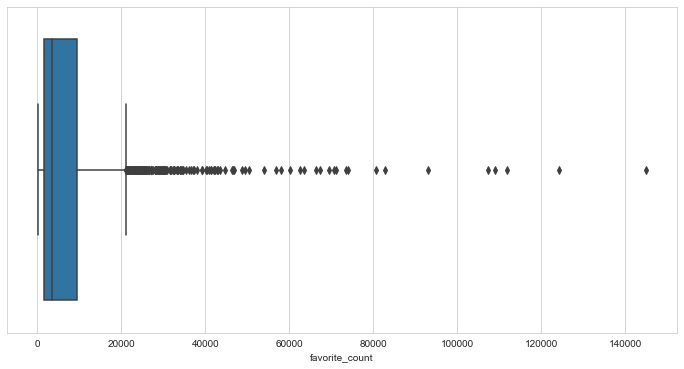

In [159]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(x='favorite_count', data=twitter_full_final)
plt.show();

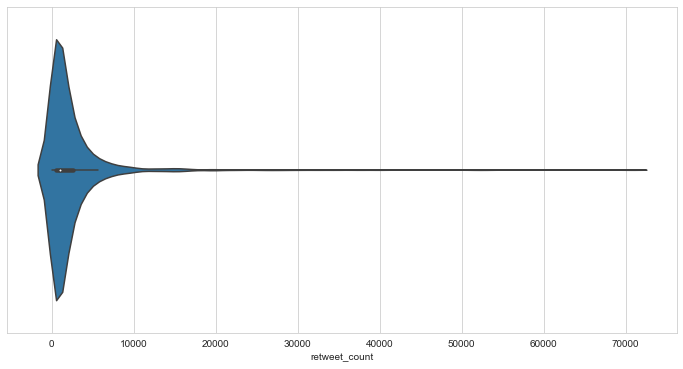

In [160]:
fig, ax = plt.subplots(figsize=(12,6))
sns.violinplot(x='retweet_count', data=twitter_full_final)
plt.show();

**From the boxplot and violin plots above, most of the tweets on the WeRateDogs twitter page pulled have less than 10,000 favorite counts and retweet_counts.**

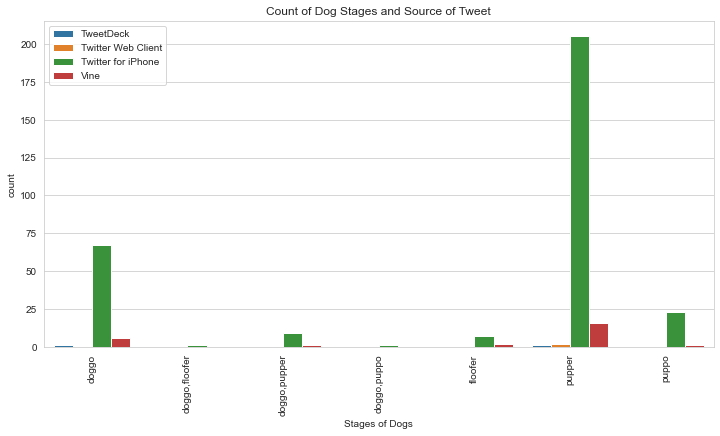

In [161]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x='stage', data=twitter_full_final, hue='source')
plt.title('Count of Dog Stages and Source of Tweet')
plt.xlabel('Stages of Dogs')
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.show()
fig.savefig('dog_stages-source.jpg');

**Pupper was the most common stage of dogs tweeted and posted on the WeRateDogs twitter channel while most tweets originated from the Twitter App for Iphones. This is as most people make use of social media applications on mobile phones and with the proliferation of Iphones among the teeming populace.**

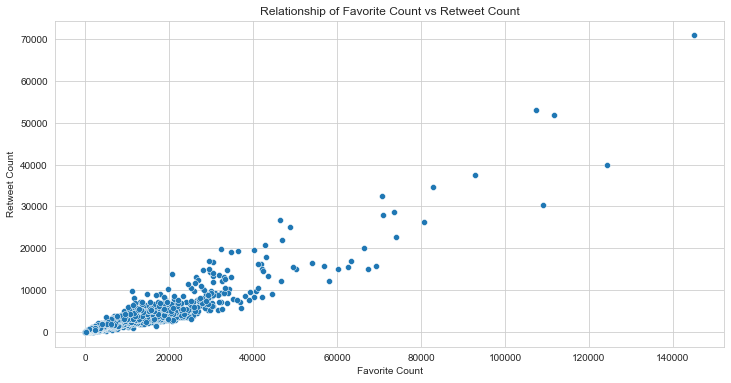

In [162]:
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x='favorite_count', y='retweet_count', data=twitter_full_final)
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.title('Relationship of Favorite Count vs Retweet Count')
plt.show()
fig.savefig('favorite_vs_retweet.jpg');

**The scatter plot above shows that there is a correlation between the favorite count and retweet count. as the number of retweets increases, there is an increase in the number of likes. The more the retweets, the tweets reaches a wider audience which results in more likes.**

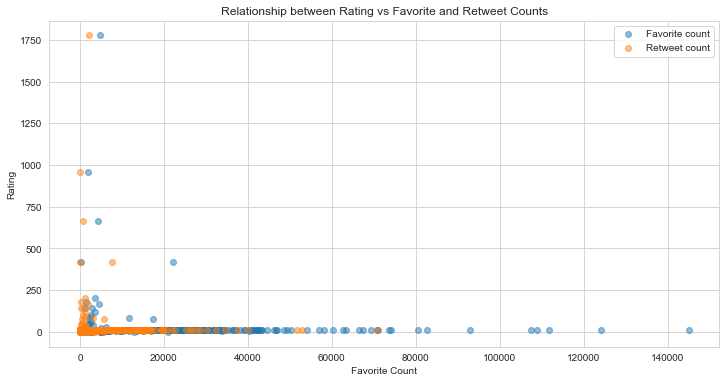

In [163]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(x=twitter_full_final.favorite_count, y=twitter_full_final.rating_numerator, label='Favorite count', alpha=0.5)
ax.scatter(x=twitter_full_final.retweet_count, y=twitter_full_final.rating_numerator, label='Retweet count', alpha=0.5)
ax.set_title('Relationship between Rating vs Favorite and Retweet Counts')
ax.set_xlabel("Favorite Count")
ax.set_ylabel("Rating")
plt.legend()
plt.show()
fig.savefig('rating_vs-favorite-retweet.jpg');

**There is no correlation between the rating score and the number of likes nor the number of retweets as shown in the plot above.**

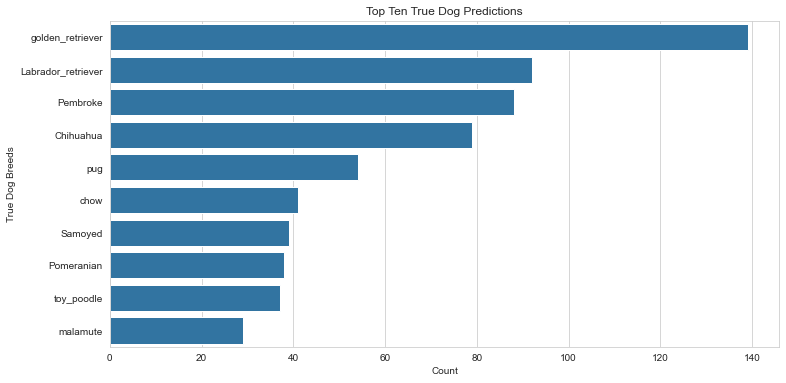

In [164]:
highest_dog = twitter_full_final['p1'][twitter_full_final['p1_dog'] == True].value_counts(ascending=False).head(10)
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(y=highest_dog.index, x= highest_dog, data=twitter_full_final, color=color, orient='h')
plt.xlabel('Count')
plt.ylabel('True Dog Breeds')
plt.title('Top Ten True Dog Predictions')
plt.show()
fig.savefig('true_pred.jpg');

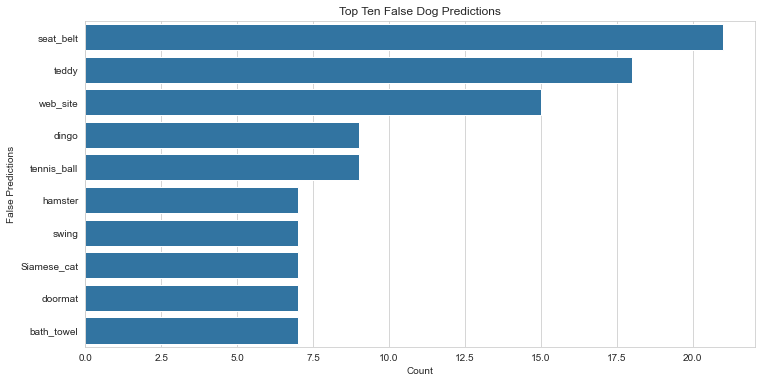

In [165]:
# Plot for predictions not dogs
highest_not_dog = twitter_full_final['p1'][twitter_full_final['p1_dog'] != True].value_counts(ascending=False).head(10)
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(y=highest_not_dog.index, x= highest_not_dog, data=twitter_full_final, color=color, orient='h')
plt.xlabel('Count')
plt.ylabel('False Predictions')
plt.title('Top Ten False Dog Predictions')
plt.show()
fig.savefig('false_pred.jpg');

**`Golden Retriever`** **was the most popular dog breed truly predicted in p1 in the dataset with** **`139`** **predictions as True and** **`Labrador Retriever`** **as the second on the list with** **`92.`**

**`Seatbelt`** **was the most popular false prediction in p1 in the dataset with** **`21`** **predictions as False and** **`teddy`** **as the second on the list with** **`18.`** **15 dogs were wrongly predicted as** **`webs_site`**.

### Insights:
1. The tweet with the highest favorite count and retweets is tweet_id: 744234799360020481, number of likes: 145002, number of retweets: 70821.

2. The data revealed that 2151 (99.31%) of the tweets were written in English Language with 7 other languages taking up about 0.69% in total.

3. The most popular rating score for the dogs was 12 with count of 498. The majority of the rating ranged from 9 and 13. The plot showed outliers with ratings having few values above 500.

4. From the boxplot and violin plots above, most of the tweets on the WeRateDogs twitter page pulled have less than 10,000 favorite counts and retweet_counts.

5. Pupper was the most common stage of dogs tweeted and posted on the WeRateDogs twitter channel while most tweets originated from the Twitter App for Iphones. This is as most people make use of social media applications on mobile phones and with the proliferation of Iphones among the teeming populace.

6. The scatter plot above shows that there is a correlation between the favorite count and retweet count. as the number of retweets increases, there is an increase in the number of likes. The more the retweets, the tweets reaches a wider audience which results in more likes.

7. There is no correlation between the rating score and the number of likes nor the number of retweets as shown in the plot above.

8. Golden Retriever was the most popular dog breed truly predicted in p1 in the dataset with 139 predictions as True and Labrador Retriever as the second on the list with 92.

9. Seatbelt was the most popular false prediction in p1 in the dataset with 21 predictions as False and teddy as the second on the list with 18. 15 dogs were wrongly predicted as webs_site.

<a id='conclusion'></a>
## Conclusions

The project was completed by gathering data from 3 different sources. The data was assesses using both visualization and programmatic assessment. All quality and tidiness issues identified were cleaned and assessed.

Limitations observed include:

1. The dataset contained only few values in the dog stage. This could be further gotten from the text column in the dataset.

2. Some rating denominator and numerator have not been accurately extracted from the dataset.